In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [3]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [4]:
EXPERIMENT_NAME = 'stress_testing_outliers'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '2ac180f6-0415-4313-81b9-3c2d96d2129f'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['No']

In [5]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(672, 25)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 22:34:29.054,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.714015,0.718266,0.707317,0.710037,0.723404,0.707260,0.742574
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,1,OK,2023-04-23 22:34:29.064,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.714015,0.715170,0.712195,0.706320,0.723404,0.707260,0.742574
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,2,OK,2023-04-23 22:34:29.075,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.710227,0.712074,0.707317,0.702602,0.723404,0.702576,0.742574
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,3,OK,2023-04-23 22:34:29.087,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.708333,0.708978,0.707317,0.698885,0.723404,0.700234,0.742574
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,4,OK,2023-04-23 22:34:29.100,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.696970,0.693498,0.702439,0.691450,0.723404,0.693208,0.712871
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,5,OK,2023-04-23 22:34:29.112,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.687500,0.681115,0.697561,0.676580,0.723404,0.681499,0.712871
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,6,OK,2023-04-23 22:34:29.125,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.678030,0.678019,0.678049,0.669145,0.702128,0.669789,0.712871
14,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 22:34:55.668,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.717803,0.727554,0.702439,0.728625,0.723404,0.716628,0.722772
15,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,1,OK,2023-04-23 22:34:55.677,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.708333,0.721362,0.687805,0.721190,0.723404,0.704918,0.722772
16,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,2,OK,2023-04-23 22:34:55.689,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.704545,0.721362,0.678049,0.721190,0.723404,0.700234,0.722772


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [11]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [12]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [13]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.676987
1,Entropy,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.387364
2,F1,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.705986
3,FNR,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.283810
4,FPR,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.369369
...,...,...,...,...,...,...,...,...
107,Positive-Rate,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.943590
108,Selection-Rate,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.464646
109,Std,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.176539
110,TNR,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.703980


In [14]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,sex,0.321212
1,Equalized_Odds_FPR,DecisionTreeClassifier,sex,0.262981
2,Disparate_Impact,DecisionTreeClassifier,sex,2.011923
3,Statistical_Parity_Difference,DecisionTreeClassifier,sex,0.514394
4,Accuracy_Parity,DecisionTreeClassifier,sex,-0.026403
5,Label_Stability_Ratio,DecisionTreeClassifier,sex,0.911014
6,IQR_Parity,DecisionTreeClassifier,sex,0.011536
7,Std_Parity,DecisionTreeClassifier,sex,0.002352
8,Std_Ratio,DecisionTreeClassifier,sex,1.013468
9,Jitter_Parity,DecisionTreeClassifier,sex,0.028084


### Subgroup metrics per dataset, experiment iteration, and model

In [15]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [16]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [17]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [18]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [19]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [20]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [21]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [22]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [23]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

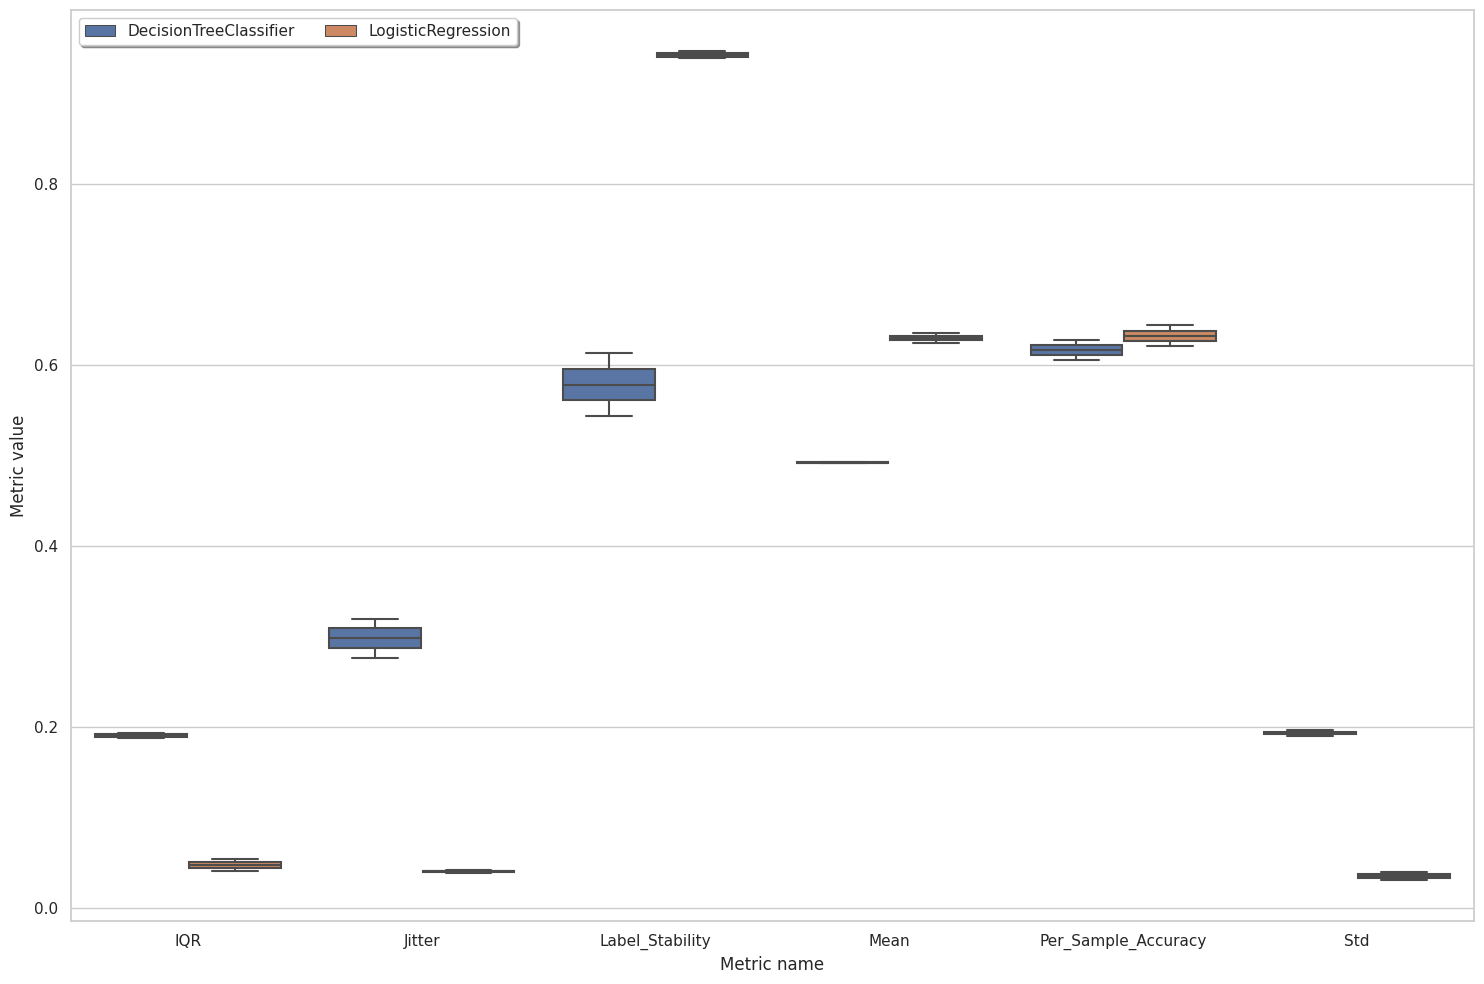

In [24]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

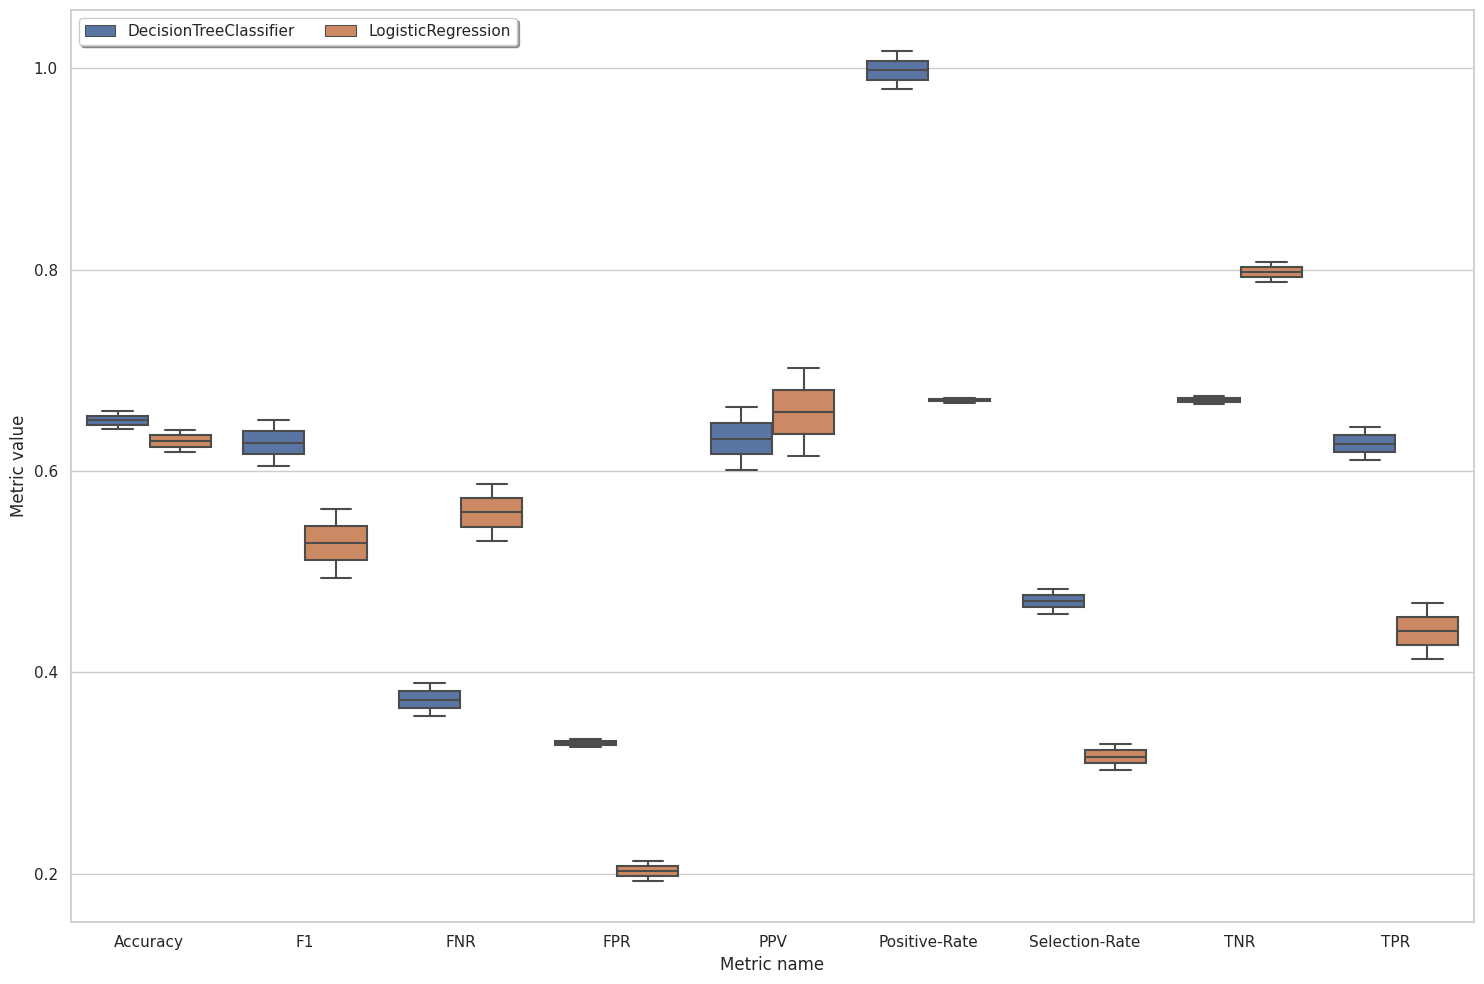

In [25]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

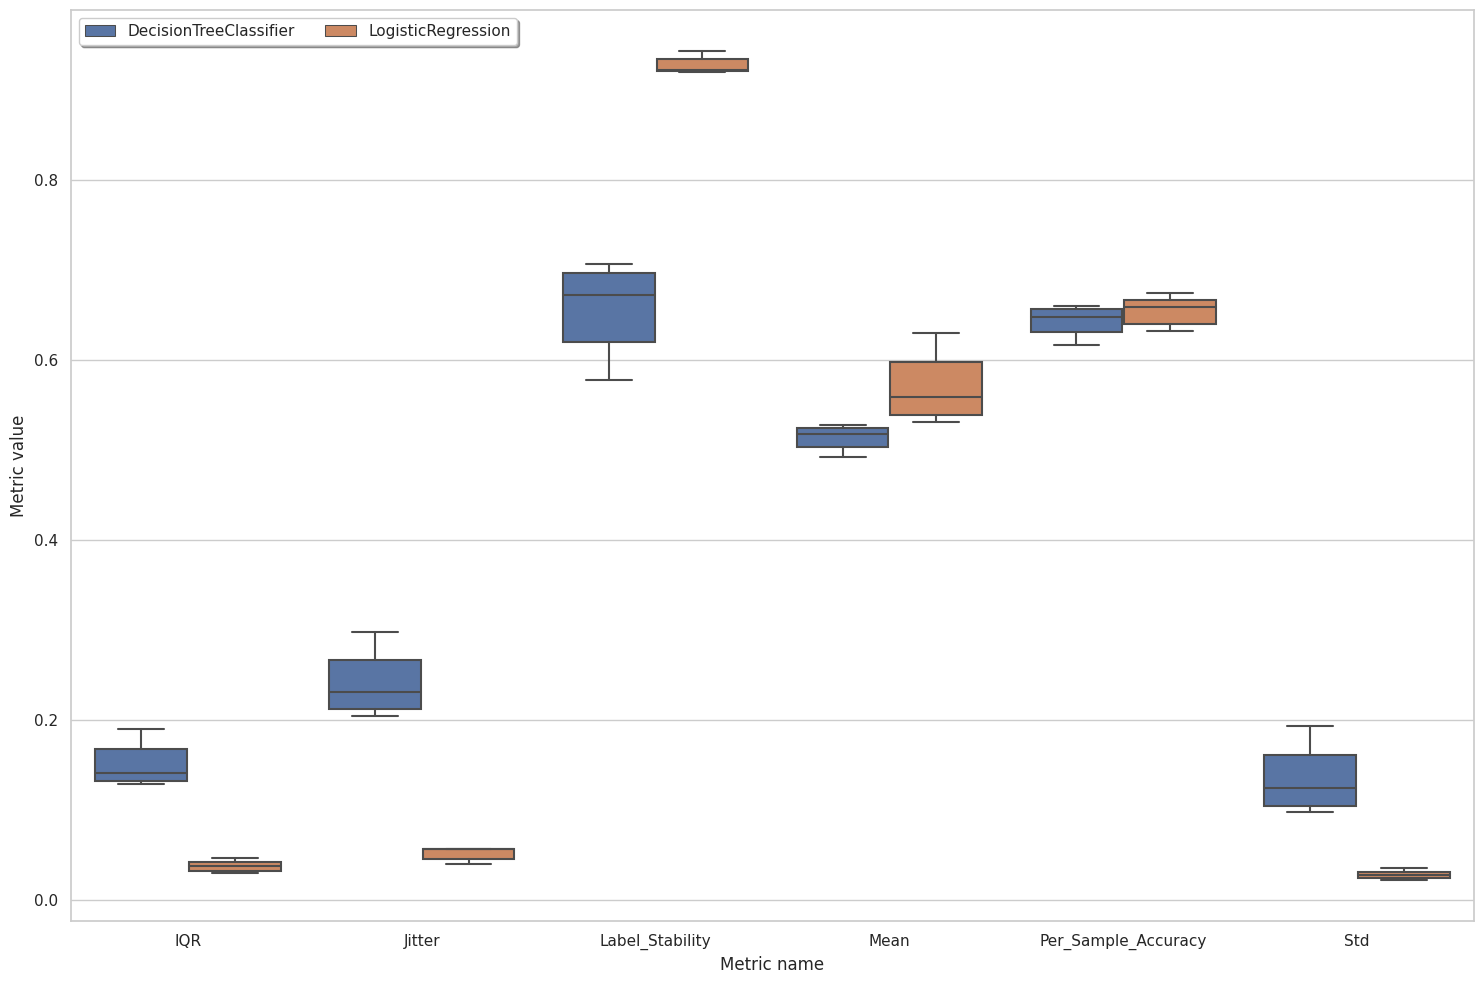

In [26]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

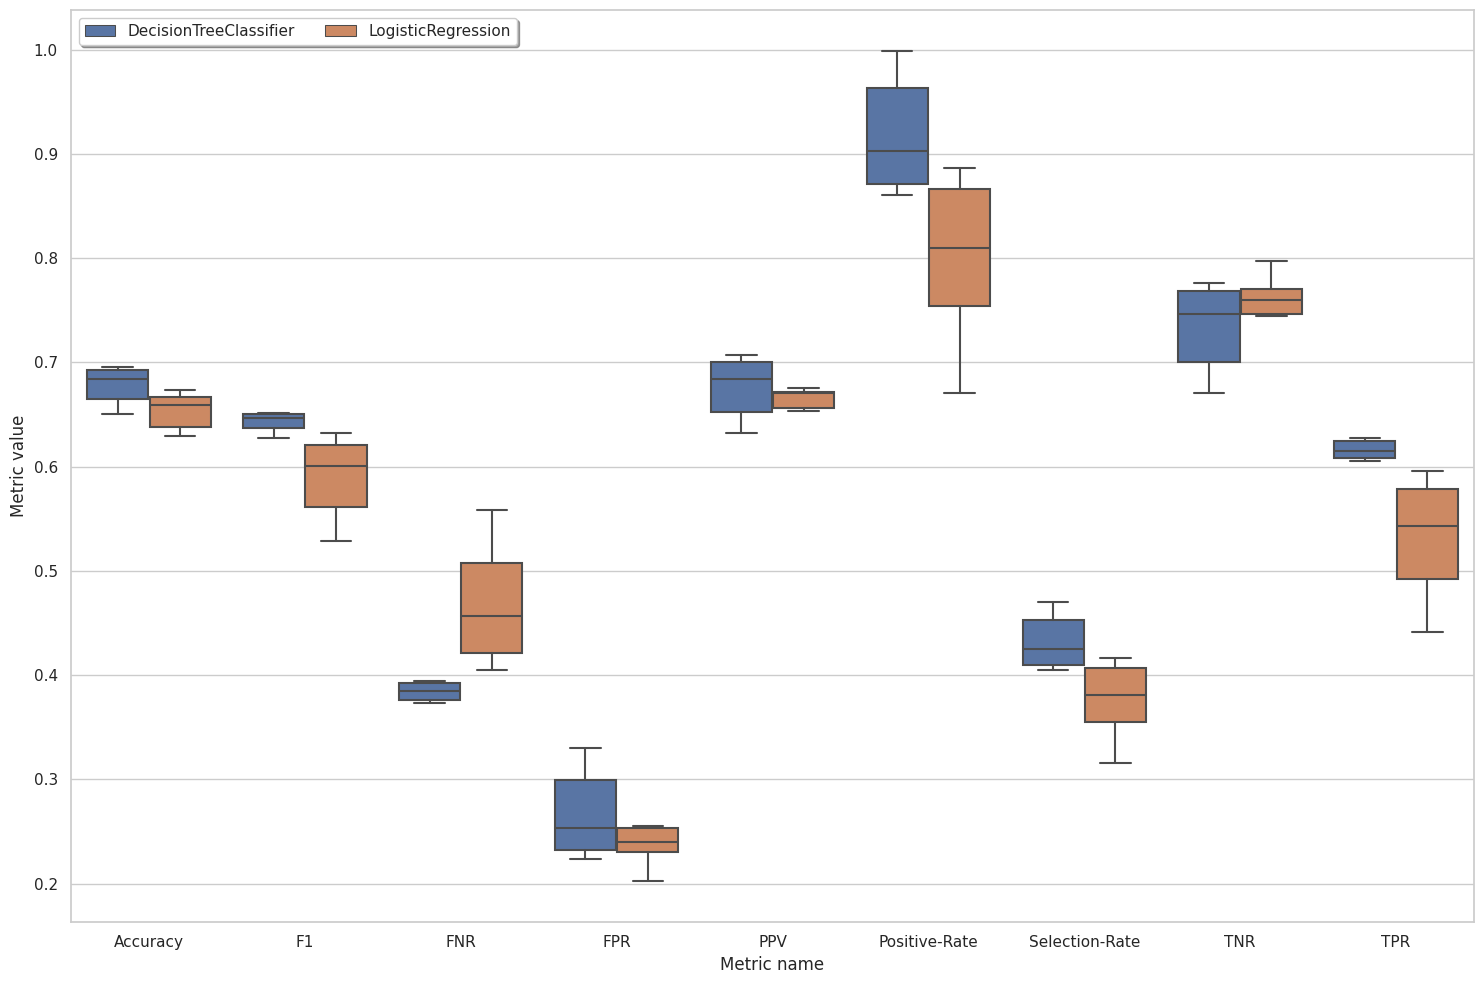

In [27]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')